<a href="https://colab.research.google.com/github/rjanow/Masterarbeit/blob/main/0_1_CAMS_GLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Verbinden mit der Google Drive und Import der benötigten Module:

In [1]:
# Verbinden mit der Google-Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os, sys

In [3]:
!pip install factor_analyzer
!pip install prophet

In [4]:
## import modules

import numpy as np
import pandas as pd
import matplotlib

import seaborn as sns

from datetime import datetime
from datetime import timedelta

In [5]:
latitude = 50.2
longitude = 7.8

seconds_in_day = 24*60*60
seconds_in_year = (365.2425)*seconds_in_day

In [6]:
# Pfad zur CSV-Datei auf Google Drive
# UVI Index Messwerte
name_Messwerte = 'UVI_Messdaten.csv'
# Globalstrahlungsmesswerte
name_Solar_Messwerte = 'Solys_Messdaten.csv'
# CAMS Meteorologische Vorhersagedaten
name_Vorhersage = 'Vorhersage.csv'
# CAMS Globalstrahlungsvorhersage
name_GlobalVorhersage = 'solar_radiation_forecast.csv'

drive_path = '/content/drive/My Drive/Colab_Notebooks/Clean_Data/'
GLO_drive_path = '/content/drive/My Drive/Colab_Notebooks/CSV_SolarRadiation/'
output_plot_path = '/content/drive/My Drive/Colab_Notebooks/plot_daily_UVI/'

In [7]:
# Import der Daten für die EDA
df_UVI = pd.read_csv(drive_path + name_Messwerte)
df_Solys = pd.read_csv(drive_path + name_Solar_Messwerte)
df_CAMS = pd.read_csv(drive_path + name_Vorhersage)
df_GLO_CAMS = pd.read_csv(GLO_drive_path + name_GlobalVorhersage)

# Messzeitpunkt in Datetime umwandeln
df_UVI.set_index('Datetime', inplace=True)
df_Solys.set_index('Datetime', inplace=True)
df_CAMS.set_index('Datetime', inplace=True)
df_GLO_CAMS.set_index('Observation_period', inplace=True)

# Index in Datetime umwandeln
df_UVI.index = pd.to_datetime(df_UVI.index)
df_Solys.index = pd.to_datetime(df_Solys.index)
df_CAMS.index = pd.to_datetime(df_CAMS.index)
df_GLO_CAMS.index = pd.to_datetime(df_GLO_CAMS.index)

# NaN Einträge durch 0 ersetzen
df_UVI['UVI'] = df_UVI['UVI'].fillna(0)
df_UVI['erythem'] = df_UVI['erythem'].fillna(0)
df_Solys.dropna(inplace = True)

In [8]:
df_GLO_CAMS

,Clear_sky_GHI,Clear_sky_BHI,GHI,BHI
Observation_period,,,,
2022-06-01 00:01:00,0.0,0.0,0.0,0.0
2022-06-01 00:03:00,0.0,0.0,0.0,0.0
2022-06-01 00:05:00,0.0,0.0,0.0,0.0
2022-06-01 00:07:00,0.0,0.0,0.0,0.0
2022-06-01 00:09:00,0.0,0.0,0.0,0.0
...,...,...,...,...
2023-08-31 23:51:00,0.0,0.0,0.0,0.0
2023-08-31 23:53:00,0.0,0.0,0.0,0.0
2023-08-31 23:55:00,0.0,0.0,0.0,0.0


In [9]:
# In df_GLO_CMAS ersetzen aller 0 Einträge durch nan
df_GLO_CAMS.replace(0, np.nan, inplace=True)
# Entfernen aller Zeilen mit NaN-Werten
df_GLO_CAMS.dropna(inplace=True)

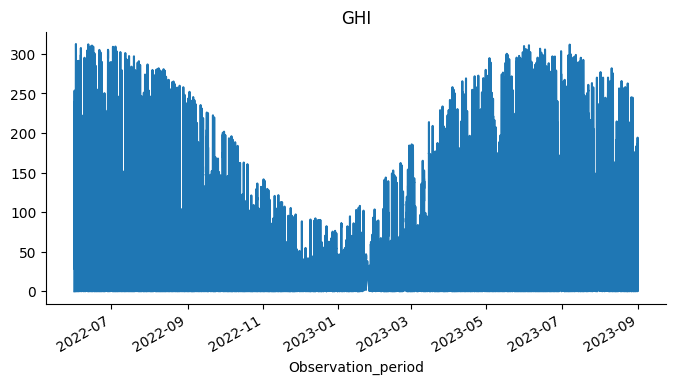

In [10]:
# Plotten der GHI-Werte über das Jahr
from matplotlib import pyplot as plt
df_GLO_CAMS['GHI'].plot(kind='line', figsize=(8, 4), title='GHI')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
def keep_common_rows(df_a, df_b):
    # Sicherstellen, dass beide DataFrames einen DateTime-Index haben
    df_a.index = pd.to_datetime(df_a.index)
    df_b.index = pd.to_datetime(df_b.index)

    # Finden der gemeinsamen Zeitpunkte unter Berücksichtigung der Minute-Verschiebung
    common_index = df_a.index.isin(df_b.index) # | df_a.index.shift(-pd.Timedelta(minutes=1)).isin(df_b.index)

    # Filtern von DataFrame A basierend auf den gefundenen gemeinsamen Zeitpunkten
    df_a_filtered = df_a[common_index]

    return df_a_filtered

In [16]:
df_GLO_CAMS = keep_common_rows(df_GLO_CAMS, df_Solys)

In [20]:
df_GLO_CAMS

,Clear_sky_GHI,Clear_sky_BHI,GHI,BHI
Observation_period,,,,
2022-06-15 07:21:00,188.748,154.357,188.748,154.3570
2022-06-15 07:23:00,190.480,155.933,190.480,155.9330
2022-06-15 07:25:00,192.206,157.504,192.206,157.5040
2022-06-15 07:27:00,193.924,159.068,193.924,159.0680
2022-06-15 07:29:00,195.635,160.627,195.635,160.6270
...,...,...,...,...
2023-03-22 12:19:00,213.539,171.420,77.163,0.0839
2023-03-22 12:21:00,213.134,171.004,76.276,0.0764
2023-03-22 12:23:00,212.708,170.571,75.385,0.0689


In [21]:
def save_dataframe_to_drive(dataframe, folder_path, filename):

    # Erstelle den vollen Pfad zur Datei
    full_path = os.path.join(folder_path, filename)
    dataframe.reset_index(inplace=True)

    # Speichere den DataFrame als CSV-Datei auf Google Drive
    dataframe.to_csv(full_path, index=False)

    print(f'Der DataFrame wurde als {filename} in {folder_path} auf Google Drive gespeichert.')

In [22]:
df_file_name = 'solar_radiation_forecast.csv'
save_dataframe_to_drive(df_GLO_CAMS, '/content/drive/My Drive/Colab_Notebooks/Clean_Data', df_file_name)

Der DataFrame wurde als solar_radiation_forecast.csv in /content/drive/My Drive/Colab_Notebooks/Clean_Data auf Google Drive gespeichert.
